## Principal Component Analysis

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
# read data from csv file
cols = []
rows = []
with open('goblet.csv', 'r') as f:
    cols = f.readline().strip().split(',')
    for line in f:
        rows.append(line.strip().split(',')[0])

data = np.genfromtxt('goblet.csv', delimiter=',', skip_header=1)[:,1:]

### 1. Correlation matrix

In [76]:
corr = np.corrcoef(data.T)
corr_disp = pd.DataFrame(np.round(corr,3), columns=cols[1:], index=cols[1:])
print(corr_disp)


       Wo     Wg     Ht     Ws     Wn     Hs     Hg
Wo  1.000  0.623  0.346  0.675  0.690  0.588  0.069
Wg  0.623  1.000  0.839  0.829  0.581  0.797  0.693
Ht  0.346  0.839  1.000  0.843  0.251  0.858  0.902
Ws  0.675  0.829  0.843  1.000  0.487  0.910  0.604
Wn  0.690  0.581  0.251  0.487  1.000  0.289  0.165
Hs  0.588  0.797  0.858  0.910  0.289  1.000  0.552
Hg  0.069  0.693  0.902  0.604  0.165  0.552  1.000


**Patterns observed:**
* Every variable is positively correlated with every other variable, presumably because all individual dimensions would increase together if the goblet got bigger.
* This means the variables are highly multicollinear.

### 2. PCA with covariance

#### Part a)

In [77]:
without_Ht = np.concatenate((data[:,:2], data[:,3:]), axis=1)
cov = np.cov(without_Ht.T)
new_cols = cols[1:3] + cols[4:]
cov_disp = pd.DataFrame(np.round(cov,3), columns=new_cols, index=new_cols)
print(cov_disp)
total_var = np.sum(np.diag(cov))
print(f'\nTotal variance is approx. {total_var:.2f}')

       Wo      Wg      Ws     Wn      Hs      Hg
Wo  9.043   8.130   8.408  4.478   5.548   0.782
Wg  8.130  18.807  14.892  5.435  10.853  11.262
Ws  8.408  14.892  17.167  4.358  11.842   9.383
Wn  4.478   5.435   4.358  4.657   1.955   1.338
Hs  5.548  10.853  11.842  1.955   9.860   6.502
Hg  0.782  11.262   9.383  1.338   6.502  14.060

Total variance is approx. 73.59


#### Part b)

In [78]:
eig_vals, eig_vecs = np.linalg.eig(cov)
print(eig_vals)

[53.28016201 11.68381021  4.9342706   2.04751093  1.149141    0.49843858]


The first PC has a variance of 53.28

#### Part c)

The second PC has a variance of 11.68

#### Part d)

In [79]:
proportions = eig_vals / total_var
cum_proportions = np.cumsum(proportions)
print(f'Cumulative proportions:\n {cum_proportions}')

Cumulative proportions:
 [0.72398082 0.88274262 0.94979042 0.97761238 0.99322712 1.        ]


The first 2 PCs explain about 88.3% of total variance

#### Part e)

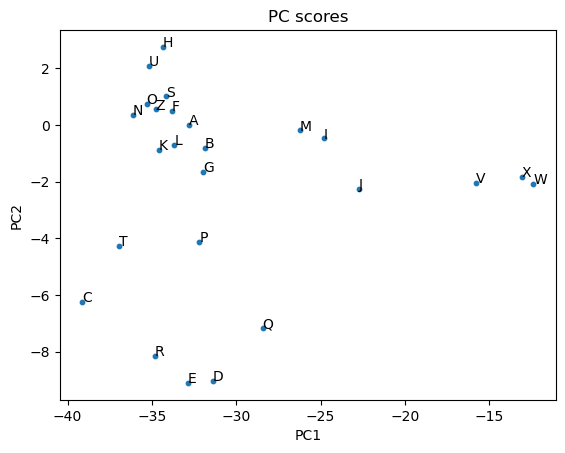

In [80]:
PC_scores = without_Ht @ eig_vecs

# plot PC scores
plt.figure()
plt.scatter(PC_scores[:,0], PC_scores[:,1], s=10)
for i in range(len(rows)):
    plt.text(PC_scores[i,0], PC_scores[i,1], rows[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC scores')
plt.show()

In [114]:
# eigenvectors of covariance matrix
cov_disp = pd.DataFrame(np.round(eig_vecs[:,:2],3), columns=['PC1', 'PC2'],
                         index=cols[1:3]+cols[4:])
print(cov_disp)

      PC1    PC2
Wo -0.278 -0.601
Wg -0.566  0.033
Ws -0.540 -0.107
Wn -0.163 -0.295
Hs -0.387 -0.036
Hg -0.367  0.733


#### Part f)

The first eigenvector is proportional to the mean, which means it distinguishes goblets by overall size.

#### Part g)

The second eigenvector differentiates between maximum (width + height) and overall size, which means it helps to classify tall and narrow vs short and wide globes.

### 3. PCA with correlation

In [113]:
corr = np.corrcoef(without_Ht.T)
eig_vals2, eig_vecs2 = np.linalg.eig(corr)
total_var2 = np.sum(eig_vals2)
print(f'Individual variances:\n {np.round(eig_vals2, 3)}')

proportions2 = eig_vals2 / total_var2
cum_proportions2 = np.cumsum(proportions2)
print(f'Cumulative proportions:\n {np.round(cum_proportions2, 3)}')

Individual variances:
 [3.945 1.179 0.571 0.042 0.12  0.144]
Cumulative proportions:
 [0.657 0.854 0.949 0.956 0.976 1.   ]


#### Part a)

Total variance is 6

#### Part b)

1st PC variance: 3.945

#### Part c)

2nd PC variance: 1.179

#### Part d)

The first 2 components explain about 85.4% of the total variance.

#### Part e)

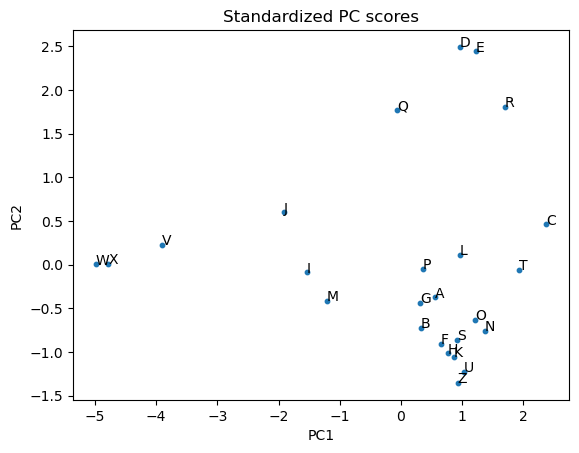

In [116]:
data_std = (without_Ht - np.mean(without_Ht, axis=0)) / np.std(without_Ht, axis=0, ddof=1)
PC_std = data_std @ eig_vecs2

# plot PC scores
plt.figure()
plt.scatter(PC_std[:,0], PC_std[:,1], s=10)
for i in range(len(rows)):
    plt.text(PC_std[i,0], PC_std[i,1], rows[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Standardized PC scores')
plt.show()

In [117]:
# eigenvectors of covariance matrix
corr_disp = pd.DataFrame(np.round(eig_vecs2[:,:2],3), columns=['PC1', 'PC2'],
                         index=cols[1:3]+cols[4:])
print(corr_disp)

      PC1    PC2
Wo  0.381  0.520
Wg  0.474 -0.099
Ws  0.477 -0.092
Wn  0.323  0.547
Hs  0.443 -0.202
Hg  0.319 -0.610


#### Part f)

The first eigenvector is proportional to the mean, which means it distinguishes goblets by overall size. For instance, goblets W and X are significantly smaller than the rest.

#### Part g)

The second eigenvector differentiates between maximum (width + height) and overall size, which means it helps to classify tall and relatively narrow (e.g. Z) vs short and relatively wide (e.g. D) globes.

### Qn 4

I would recommed the 2nd solution because variables are compared on a similar scale.

### Qn 5

The analysis will lead to similar conclusions if all 7 are included because of multicollinearity of globe dimensions which is already addressed by PCA on 6 variables.